In [1]:
import os
import json


In [2]:
def get_number_of_models(file):
    with open(os.path.join(os.path.join("out","d4_compilation_stats"),file), 'r') as fp:
        data = json.load(fp)
    if data['Number of models']=="NaN":
        return -1
    return int(data['Number of models'])


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
    

In [5]:
data = {}
timeout = 1200


In [6]:
def load_compilation_time(directory,col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_d4 = json.load(fp)
        data[file] = {}
        if data_d4['Compilation time'] != "NaN":
            data[file][col_name]=data_d4['Compilation time']
        else:
            data[file][col_name]=pd.NA
    return data

compil_key = "d4 compilation (seconds)"
tmp =load_compilation_time("out/d4_compilation_stats",compil_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [7]:
def load_jddnnf_data(directory, col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_j = json.load(fp)
        data[file] = {}
        for key,tmp in data_j.items():
            if tmp['total'] != "TIMEOUT":
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=tmp[key2]
            else:
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=pd.NA
    return data

jddnnf_key = "jddnnf %s %s"
tmp = load_jddnnf_data("out/top20_config_jddnnf",jddnnf_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [20]:
data_df = pd.DataFrame.from_dict(data,orient='index')


In [23]:
print(data_df.shape)
data_df 

(221, 21)


,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0,jddnnf parsing 1,jddnnf smoothing 1,jddnnf top 1,jddnnf total 1,jddnnf parsing 2,...,jddnnf top 2,jddnnf total 2,jddnnf parsing 3,jddnnf smoothing 3,jddnnf top 3,jddnnf total 3,jddnnf parsing 4,jddnnf smoothing 4,jddnnf top 4,jddnnf total 4
10.sk_1_46.json,0.032582,0.014,0.021,0.021,0.164830,0.015,0.021,0.022,0.165087,0.014,...,0.021,0.165122,0.014,0.022,0.022,0.165112,0.015,0.021,0.022,0.164985
107.sk_3_90.json,0.032454,0.026,0.035,0.176,0.315305,0.026,0.035,0.175,0.365765,0.026,...,0.174,0.315514,0.027,0.035,0.177,0.365519,0.026,0.036,0.175,0.365564
109.sk_4_36.json,0.064967,0.019,0.028,0.047,0.215189,0.019,0.028,0.048,0.215084,0.019,...,0.044,0.214999,0.018,0.027,0.048,0.215352,0.019,0.028,0.047,0.215281
110.sk_3_88.json,0.716410,0.035,0.055,0.489,0.666591,0.035,0.054,0.487,0.666529,0.035,...,0.490,0.666570,0.035,0.055,0.479,0.666339,0.035,0.056,0.484,0.666500
111.sk_2_36.json,0.032428,0.016,0.024,0.028,0.164904,0.017,0.023,0.029,0.164809,0.016,...,0.029,0.164976,0.016,0.024,0.029,0.165101,0.017,0.023,0.030,0.164937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s953a_7_4.json,0.164813,0.037,0.128,0.134,0.415507,0.037,0.128,0.132,0.415570,0.037,...,0.132,0.415694,0.037,0.126,0.130,0.415600,0.037,0.128,0.131,0.415581
tableBasedAddition.sk_240_1024.json,0.016210,0.012,0.017,0.016,0.165199,0.013,0.017,0.015,0.165125,0.012,...,0.016,0.164923,0.012,0.017,0.016,0.165115,0.012,0.018,0.015,0.165148
toybox.json,0.016552,0.013,0.017,0.013,0.164967,0.012,0.018,0.012,0.164881,0.013,...,0.013,0.164963,0.012,0.018,0.012,0.165011,0.013,0.017,0.013,0.164946
uClibc.json,0.032780,0.014,0.024,0.024,0.165005,0.014,0.024,0.025,0.164876,0.014,...,0.024,0.164863,0.014,0.025,0.024,0.165033,0.014,0.023,0.025,0.164948


In [9]:
jddnnf_ave_key = "%s average (seconds)"
for key2 in ["parsing","smoothing","top", "total"]:
    data_df[jddnnf_ave_key % key2] = (data_df[jddnnf_key % (key2,"0")] + data_df[jddnnf_key % (key2,"1")] + 
                               data_df[jddnnf_key % (key2,"2")] + data_df[jddnnf_key % (key2,"3")] + 
                               data_df[jddnnf_key % (key2,"4")])/5

In [10]:
data_df["compile+total"] = data_df["d4 compilation (seconds)"]+data_df["total average (seconds)"]

In [11]:
lines_with_null = data_df.index[data_df.isnull().any(axis=1)]
clean_df= data_df.copy()
clean_df= clean_df.drop(lines_with_null)

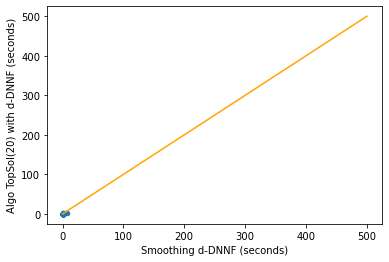

In [12]:
smooth_key = "smoothing average (seconds)"
top_key= "top average (seconds)"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={smooth_key: "Smoothing d-DNNF (seconds)", 
                                  top_key: "Algo TopSol(20) with d-DNNF (seconds)"})
plot_df.plot(x="Smoothing d-DNNF (seconds)", y="Algo TopSol(20) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,100],[0,1oo],'-',color="orange")
plt.show()

In [13]:
clean_df["d4 compilation (seconds)"] = clean_df["d4 compilation (seconds)"].astype("float64", errors = 'raise')
clean_df["compile+total"] = clean_df["compile+total"].astype("float64", errors = 'raise')


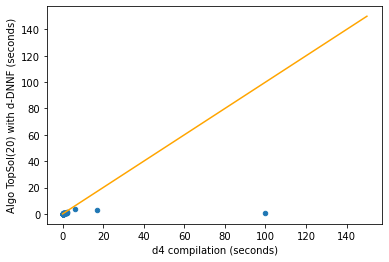

In [21]:
compil_key = "d4 compilation (seconds)"
top_key= "top average (seconds)"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={compil_key: "d4 compilation (seconds)", 
                                  top_key: "Algo TopSol(20) with d-DNNF (seconds)"})
plot_df.plot(x="d4 compilation (seconds)", y="Algo TopSol(20) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,150],[0,150],'-',color="orange")
plt.show()

In [15]:
analyze_df=clean_df.copy()
analyze_df["top average (seconds)"].describe()

count    221.000000
mean       0.140339
std        0.372366
min        0.003200
25%        0.017000
50%        0.030800
75%        0.101400
max        3.498600
Name: top average (seconds), dtype: float64

In [16]:
d4_df =analyze_df["d4 compilation (seconds)"]
d4_df.describe()

count    221.000000
mean       0.745921
std        6.826321
min        0.016185
25%        0.032567
50%        0.064554
75%        0.164879
max      100.010644
Name: d4 compilation (seconds), dtype: float64

In [17]:
analyze_df["compile+total"].describe()

count    221.000000
mean       1.170741
std        7.117702
min        0.131075
25%        0.197477
50%        0.249698
75%        0.480596
max      101.379365
Name: compile+total, dtype: float64

In [18]:
analyze_df["smoothing average (seconds)"].describe()

count    221.000000
mean       0.151129
std        0.571627
min        0.011200
25%        0.023600
50%        0.032600
75%        0.071800
max        6.831600
Name: smoothing average (seconds), dtype: float64

In [19]:
analyze_df["parsing average (seconds)"].describe()

count    221.000000
mean       0.029506
std        0.033559
min        0.008000
25%        0.013800
50%        0.017600
75%        0.030000
max        0.256800
Name: parsing average (seconds), dtype: float64